!['alt text'](PrecisionLender.png "Title")
# PrecisionLender - Data Scientist Interview - Homework Assignment
##### Thomas Hepner 
##### November 18th, 2016
___

## TASK: Identify a group of banks that are "like" a given bank.
___

#### 1. A) Where would you start?  
___

In order to complete the task, I first need to determine what makes any given bank similar to any other individual bank. In other words, *what characteristics or attributes are important to determine the similarity between individual banks?*

___

#### 1. B) What information do you wish you had?
___

There are a few pieces of information that, if available, would be helpful for this task:
* __Feedback from internal and external customers:__ The characteristics that are important to customers for comparing banks may not be the same attributes as those reported to government regulators.


* __Access to transaction level banking data:__ This is necessary for calculating banking metrics such as the average loan-to-value  ratio on a typical owner-occupied real estate loan for a group of banks. Data available to the public, or at the least the data I found online, did not have transactional level information.

Since I do not have access to this data, I will start by obtaining some basic information about the different categories of banks. A quick Google search reveals that there are 7 major [types of banks](https://www.thebalance.com/types-of-banks-315214): 

| **Type** | **Short Description** |
| ---- | ----------- |
| **Retail** | Focus on consumers as customers (Products: Checking and Savings accounts, Certificates of Deposit, etc.) |
| **Commercial** | Focus on business customers (Lending money, Lines of Credit, Foreign Exchange, etc.) |
| **Investment** | Help businesses work in financial markets. |
| **Central** | Manage the monetary system for a government.|
| **Credit Unions** | Similar to retail and commerical banks in products and services provided, but are non-profit organizations owned by customers. | 
| **Online Banks** | Operate entirely online. Typically, provide retail banking products. | 
| **Savings and Loan Associations** | Specialized banks created to promote affordable home ownership, using deposits from customers to fund home loans. |
___

Since PrecisionLender's business model and software is tailored for commercial banking needs,  I will narrow my analysis to *only Retail, Commercial, and Online banks* as well as *Credit Unions and Savings and Loan associations* for the purposes of this assignment.

___

Now that I know some basic information about the broad categories of banks, I want to dive deeper by asking the following questions:  

* __What differentiates banks within a category?__ For instance, what attributes can be used to subcategorize Retail banks?


* __Can banks be compared across categories?__ For example, is it appropriate to compare a Retail bank to a Commercial bank or Credit Union?

___

To dive into these questions, I examined the link provided for the assignment to the [Federal Financial Institutions Examinations Council](https://cdr.ffiec.gov/public/ManageFacsimiles.aspx) website. Here are some of the differentiating factors I found on the [view and download data for individual institutions](https://cdr.ffiec.gov/public/ManageFacsimiles.aspx) site: 

* __Category:__ Commercial, Savings, Credit Card Specialty, Bankers, Trust


* __Ownership:__ Stock-Owned, Mutually Owned


* __Total Assets:__ Less than \$100 million, \$100 million - \$300 million, \$300 million - \$1 billion, \$1 billion - \$3 billion, More than \$3 billion


* __Geographical Location:__ National, State, City, Metropolitan Area

Taken together, these factors constitute what is called a __*[peer group](https://www.ffiec.gov/ubpr_memo_200311.htm)*__. Due to lack of perfect information, I will make the assumption that when we want to identify a group of a banks "like" a given bank, we are interested in the individual bank's peer group. I will compare banks to their respective peer groups for the purposes of this assignment. This seems like a reasonable first approach to tackling this task.
___

#### 1. C) In the absence of perfect knowledge and access to perfect data, what can you do to make a first attempt?  Now do it.  Explain your rationale, the steps you took and the decisions you made along the way, as if you were leaving notes for the next person who might tackle this problem.

For a first attempt, I am going to download and explore public data to see if we can use existing groups or construct custom peer groups for individual banks.

**Data Sources:**
* [FFIEC - Call Reports](https://cdr.ffiec.gov/public/PWS/DownloadBulkData.aspx)
* [FFIEC - Uniform Bank Performance Reports](https://cdr.ffiec.gov/public/PWS/DownloadBulkData.aspx) (UBPR)
* [FDIC - Insitution Data](https://www5.fdic.gov/idasp/advSearch_warp_download_all.asp?intTab=2) (As of 11/17/2016)

The FDIC Call Reports and UBPRs provided by the link in the assignment were comprehensive, as they contained many metrics about 
all FDIC reporting banks in the United States. However, the data was challenging to understand and handle appropriately. This led me to search for an easier data set to understand and process.

Fortunately, I found data for individual institutions on the FDIC site. The Institution data is in a far more digestible format. I found all of variables used to build peer groups on the FFIEC website when I examined the accompanying Definitions file which contains descriptions for each column in the data. 

From the Definitions file, I discovered the revelant columns and descriptions for this analysis.

| **Column** | **Title** | **Description** |
| ---- | ----------- |
| **STNAME** | State Name | State in which the the institution is physically located. The FDIC Act defines state as any State of the United States, the District of Columbia, and any territory of the United States, Puerto Rico, Guam, American Samoa, the Trust Territory of the Pacific Islands, the Virgin Island, and the Northern Mariana Islands. |
| **CERT** | FDIC Certificate # | A unique NUMBER assigned by the FDIC used to identify institutions and for the issuance of insurance certificates. |
| **ACTIVE** | inactive |  Institutions that are currently open and insured by the FDIC | 
| **ASSET** | Total assets | The sum of all assets owned by the institution including cash, loans, securities, bank premises and other assets. This total does not include off-balance-sheet accounts. Measured in thousands. |
| **BKCLASS** | Bank Charter Class | A classification code assigned by the FDIC based on the institution's charter type (commercial bank or savings institution), charter agent (state or federal), Federal Reserve membership status (Fed member, Fed nonmember)and its primary federal regulator (state chartered institutions are subject to both federal and state supervision).   N = commercial bank, national (federal) charter and Fed member, supervised by the Office of the Comptroller of the Currency (OCC)  SM = commercial bank, state charter and Fed member, supervised by the Federal Reserve (FRB)  NM = commercial bank, state charter and Fed nonmember, supervised by the FDIC  SB = savings banks, state charter, supervised by the FDIC  SA = savings associations, state or federal charter, supervised by the Office of Thrift Supervision (OTS)  OI = insured U.S. branch of a foreign chartered institution (IBA) |
| **CITY** | City | City in which an institution's headquarters or one of its branches is physically located. Either the entire name or part of the name of a specific city may be entered to produce an Institution List. |
| **MUTUAL** | Ownership Type | Banking institutions fall into one of two ownership types, stock or non-stock. An institution which sells stock to raise capital is called a stock institution. It is owned by the shareholders who benefit from profits earned by the institution. A non-stock institution, or mutual institution, is owned and controlled solely by its depositors. A mutual does not issue capital stock. |
| **NAME** | Name | The legal name of the institution. |
___

Now that we have the "right" data, let's load and examine it!

In [142]:
# Set work directory
import os
os.chdir('D:\OneDrive\Documents\PrecisionLender Homework Assignment\data')

In [143]:
# Load Institution data
import numpy as np
import pandas as pd
institutions = pd.read_csv('INSTITUTIONS2.csv', sep = ',', low_memory = False)

For a simple example, let's filter to only show active banks in the Raleigh-Durham area. This will be our first custom **peer group**.

In [50]:
state = list(['North Carolina'])
cities = list(['Raleigh', 'Durham'])
columns = ['ACTIVE', 'CERT', 'NAME', 'STNAME', 'CITY', 'BKCLASS', 'MUTUAL', 'ACTIVE']
institutions.ix[(institutions['ACTIVE'] == 1) & (institutions['CITY'].isin(cities)) , columns]

,ACTIVE,CERT,NAME,STNAME,CITY,BKCLASS,MUTUAL,ACTIVE
7063,1,11063,First-Citizens Bank & Trust Company,North Carolina,Raleigh,NM,0,1
7783,1,12266,Mechanics & Farmers Bank,North Carolina,Durham,NM,0,1
25900,1,35100,Paragon Commercial Bank,North Carolina,Raleigh,NM,0,1
26185,1,35519,North State Bank,North Carolina,Raleigh,SM,0,1
27437,1,59049,Capital Bank Corporation,North Carolina,Raleigh,NM,0,1


Our data shows that there are 5 active FDIC-insured banks headquartered in the Raleigh-Durham area. They are all stock-owned, commercial banks and 4 out of the 5 are not members of the Federal Reserve Board; only North State Bank is a Fed member institution. All of the banks possess state, but not national charters. Total assets vary widely among the institutions, with First-Citizens Bank owning total assets of ~$32 billion, more than 4 times the total assets of the next largest bank as measured by assets.

The Definitions file also shows there are banking metrics such as Return on Equity (ROE), Return on Assets (ROA), and Net Income (NETINC) for each institution. Let's do a comparison between the individual banks and their **peer group**.

In [144]:
columns = ['NAME', 'ASSET', 'NETINC', 'ROE', 'ROA']
comparison = institutions.ix[(institutions['ACTIVE'] == 1) & (institutions['CITY'].isin(cities)) , columns]
comparison

,NAME,ASSET,NETINC,ROE,ROA
7063,First-Citizens Bank & Trust Company,"32,054,284","125,030",8.58,0.79
7783,Mechanics & Farmers Bank,"296,426",86,0.48,0.06
25900,Paragon Commercial Bank,"1,454,471","6,717",10.39,0.98
26185,North State Bank,"782,199","5,217",15.91,1.35
27437,Capital Bank Corporation,"7,631,460","31,102",6.42,0.83


Now we will display the ROE and ROA metrics in a bar plot for visualization purposes.

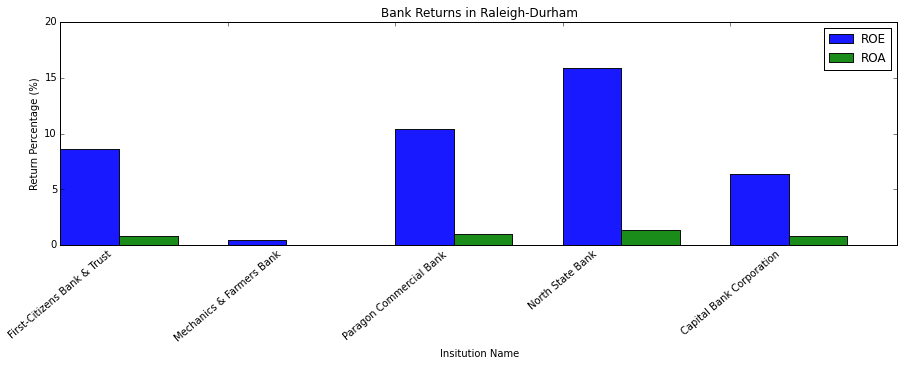

In [145]:
import matplotlib.pyplot as plt
%matplotlib inline

n_groups = comparison.shape[0]
groups = list(comparison['NAME'])
groups = [(' ').join(x.split()[0:4]) for x in groups]

ROE = comparison['ROE']
ROA = comparison['ROA']

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
ax.set_ylim([0, 20])

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.9

rects1 = plt.bar(index, ROE, bar_width,
                 alpha=opacity,
                 color='b',
                 label='ROE')

rects2 = plt.bar(index + bar_width, ROA, bar_width,
                 alpha=opacity,
                 color='g',
                 label='ROA')

plt.xlabel('Insitution Name')
plt.ylabel('Return Percentage (%)')
plt.title('Bank Returns in Raleigh-Durham')
plt.xticks(index, groups, rotation = 40)
plt.legend()
plt.show()

North State Bank has the highest ROE and ROA for this peer group. However, as we saw on the FFIEC site, peer groups are often based on Total Assets. Let's widen our analysis from the Raleigh-Durham area to all of North Carolina so that we can group by Total Assets. We will also limit to the bank class 'NM' which is short for commercial banks with a state charter that are Fed non-members banks.

In [146]:
columns = ['NAME', 'BKCLASS', 'MUTUAL', 'ASSET', 'NETINC', 'ROE', 'ROA']
nc_comparison = institutions.ix[(institutions['ACTIVE'] == 1) & (institutions['STNAME'].isin(['North Carolina'])
                                & (institutions['BKCLASS'] == 'NM')) , columns]
print 'Dimensions: ' + str(nc_comparison.shape)
nc_comparison.head()

Dimensions: (32, 7)


,NAME,BKCLASS,MUTUAL,ASSET,NETINC,ROE,ROA
1347,Farmers & Merchants Bank,NM,0,"564,709","1,902",6.24,0.68
4030,Peoples Bank,NM,0,"1,068,195","5,649",9.23,1.07
6285,Branch Banking and Trust Company,NM,0,"217,159,204","1,123,991",8.41,1.07
7063,First-Citizens Bank & Trust Company,NM,0,"32,054,284","125,030",8.58,0.79
7338,The Fidelity Bank,NM,0,"1,778,264","4,179",4.60,0.48


Now, I will group the ASSET variable into the following bins: 
* Less than \$100 million

* \$100 million - \$300 million

* \$300 million - \$1 billion

* \$1 billion - \$3 billion

* More than \$3 billion

In [147]:
nc_comparison['ASSET BINS'] = nc_comparison['ASSET'].astype(str)
nc_comparison['ASSET BINS'] = [x.replace(",", "") for x in nc_comparison['ASSET BINS']]
nc_comparison['ASSET BINS'] = nc_comparison['ASSET BINS'].astype(np.int64)
nc_comparison['ASSET BINS'] = ['Less than \$100M' if x < 100000 else x for x in nc_comparison['ASSET BINS']]
nc_comparison['ASSET BINS'] = ['\$100M - \$300M' if x < 300000 else x for x in nc_comparison['ASSET BINS']]
nc_comparison['ASSET BINS'] = ['\$300M - \$1B' if x < 1000000 else x for x in nc_comparison['ASSET BINS']]
nc_comparison['ASSET BINS'] = ['\$1B - \$3B' if x < 3000000 else x for x in nc_comparison['ASSET BINS']]
categories = ['Less than \$100M', '\$100M - \$300M', '\$300M - \$1B', '\$1B - \$3B']
nc_comparison.ix[nc_comparison['ASSET BINS'].isin(categories) == False, 'ASSET BINS'] = 'More than \$3B'
print 'Dimensions: ' + str(nc_comparison.shape)
nc_comparison.head(n=10)

Dimensions: (32, 8)


,NAME,BKCLASS,MUTUAL,ASSET,NETINC,ROE,ROA,ASSET BINS
1347,Farmers & Merchants Bank,NM,0,"564,709","1,902",6.24,0.68,\$300M - \$1B
4030,Peoples Bank,NM,0,"1,068,195","5,649",9.23,1.07,\$1B - \$3B
6285,Branch Banking and Trust Company,NM,0,"217,159,204","1,123,991",8.41,1.07,More than \$3B
7063,First-Citizens Bank & Trust Company,NM,0,"32,054,284","125,030",8.58,0.79,More than \$3B
7338,The Fidelity Bank,NM,0,"1,778,264","4,179",4.60,0.48,\$1B - \$3B
7783,Mechanics & Farmers Bank,NM,0,"296,426",86,0.48,0.06,\$100M - \$300M
9670,Southern Bank and Trust Company,NM,0,"2,403,862","6,275",5.43,0.54,\$1B - \$3B
13611,Yadkin Bank,NM,0,"7,452,883","27,470",5.92,0.85,More than \$3B
14153,Lumbee Guaranty Bank,NM,0,"323,992","1,087",6.39,0.68,\$300M - \$1B
22370,First South Bank,NM,0,"960,344","3,320",7.05,0.70,\$300M - \$1B


Now that we have a larger sampler of banks, let's compare First Citizens Bank, headquartered in Raleigh, from our original analysis with all banks in North Carolina with Total Assets exceeding $3 billion.

In [149]:
nc_comparsion_3billion = nc_comparison[nc_comparison['ASSET BINS'] == 'More than \$3B']
nc_comparsion_3billion 

,NAME,BKCLASS,MUTUAL,ASSET,NETINC,ROE,ROA,ASSET BINS
6285,Branch Banking and Trust Company,NM,0,"217,159,204","1,123,991",8.41,1.07,More than \$3B
7063,First-Citizens Bank & Trust Company,NM,0,"32,054,284","125,030",8.58,0.79,More than \$3B
13611,Yadkin Bank,NM,0,"7,452,883","27,470",5.92,0.85,More than \$3B
24717,Bank of North Carolina,NM,0,"6,476,625","31,911",8.82,1.07,More than \$3B
27107,Park Sterling Bank,NM,0,"3,166,050","10,643",5.81,0.73,More than \$3B
27437,Capital Bank Corporation,NM,0,"7,631,460","31,102",6.42,0.83,More than \$3B


Again, let's create a bar plot for easy visualization.

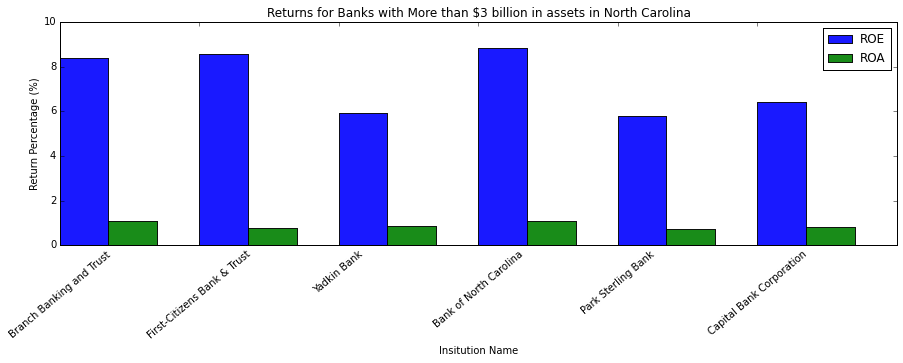

In [150]:
import matplotlib.pyplot as plt
%matplotlib inline

n_groups = nc_comparsion_3billion.shape[0]
groups = list(nc_comparsion_3billion['NAME'])
groups = [(' ').join(x.split()[0:4]) for x in groups]

ROE = nc_comparsion_3billion['ROE']
ROA = nc_comparsion_3billion['ROA']

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
ax.set_ylim([0, 10])

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.9

rects1 = plt.bar(index, ROE, bar_width,
                 alpha=opacity,
                 color='b',
                 label='ROE')

rects2 = plt.bar(index + bar_width, ROA, bar_width,
                 alpha=opacity,
                 color='g',
                 label='ROA')

plt.xlabel('Insitution Name')
plt.ylabel('Return Percentage (%)')
plt.title('Returns for Banks with More than $3 billion in assets in North Carolina')
plt.xticks(index, groups, rotation = 40)
plt.legend()
plt.show()

The ROE and ROA for the banks in this **peer group** vary less than in the prior plot. Among banks headquartered in North Carolina, with Total Assets exceeding $3 billion, First Citizens Bank has the second highest ROE, but the second lowest ROA.

___

#### 2. Now that you’re done, suppose a co-worker is eager to use your results & ideas in our business, starting immediately.  What would you advise and why?

___

It is almost always a good idea to get feedback on your preliminary work before incorporating your results and ideas immediately into the business. I would advise showing results to some colleagues first, and then presenting to external clients once we have modified and refined our results based on initial feedback. Once we have properly validated our results, received and incorporated feedback from colleagues and clients, then we could implement our results and ideas into our business. 

#### 3:  If you had more time and resources, what would you do next, to improve or refine your work?
___

* __Get more and better data:__ I only used data to classify and categorize different banks. I have not included any transactional data around banking products, such as individual home loans, into my analysis. This data would be invaluable for providing insights to our clients. It would also be helpful to compare a bank's metrics against a peer group over time, like in the [example chart](https://www.federalreserve.gov/newsevents/speech/powell20160929a.htm) below.

___

!['alt text'](bank return on assets.jpg "Title")

___

* __Talk to colleagues and clients:__ Ask about the business context of understanding why it is important to know what groups of banks are similar to a given bank. Determine what kinds of business questions they are seeking to answer with this question. Get feedback about the most common uses of this information to determine if I can refine my work to better address the needs of my customers.


* __Compile a list of common questions and/or metrics:__ Return on Equity (ROE), Return on Assets (ROA), and Net Interest Margin (NIM) are just a few examples of the many essential metrics utilized for evaluating a bank's performance. Include the items in the list as part of the analysis.


* __Create a user-friendly tool:__ Use the feedback obtained in #1 and #2 along with proprietary and public data, to create a user-friendly dashboard or tool that could be used to easily answer questions about important metrics for any bank or group of banks with a set of filters. This could be built in a Jupyter Notebook like this one, an R Shiny application, Excel, Tableau, or some other tool.


* __Demonstrate analysis:__ Show preliminary analyses and results to internal and external customers. Get additional feedback to refine analysis for business and customer needs.
___

#### 4:  Tell us what you think of this homework assignment.  What would you do differently, if you were designing it?
___

In my opinion, the assignment was a reasonable assessment of my ability to understand the nature of the task, do independent research, and handle ambiguity when acquiring and analyzing public data. Here are some things I might do differently if I were designing the task:

* __Provide additional context:__ It might be beneficial to provide some basic links other than the FFIEC data for the interviewee to get started on this assignment. I am not a domain-expert in commercial banking products (yet!) and it took me a non-trivial amount of time to do the basic research needed to get started on the assignment.


* __Provide anonymized transactional data:__ I think it could be interesting and insightful to provide the interviewee with some anonymized transactional banking data with two separate tasks. For instance, Lending Club provides its [complete set of anoymized loan data](https://www.lendingclub.com/info/download-data.action). One task could be to perform a specific analysis with the data set (Example: calculate and visualize the loan-to-value ratio for real estate loans from a given set of banks), and the other task could be a more ambiguous, and open-ended question like the original task for this assignment. 


* __Demonstrate quantitative analysis and/or visualization:__ Ask the interviewee to demonstrate a piece of their analysis using  analytical software of their choice (Python, R, Tableau, Excel, etc.) to assess their competence in at least one tool, and their ability to present and communicate their results.